Data Date Range:
    <br />Start time: 2016-05-05 09:40:26
    <br />End time: 2018-01-17 01:59:42
    
#### This notebook does the following analysis:

- Calculate ratio of rec_played/total_played, group by algorithm
- Counts and quantiles of rec_played and total_played, group by algorithm
- Count of different actions, group by algorithm
- The ratio of #actions over #rec played, group by algorithm
- The ratio of #actions over #total played, group by algorithm

### Import

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Calculate ratio of rec_played/total_played, two way analysis ###

In [3]:
aggregate_data = pd.read_csv('../Clean_Data/total_rec_refresh_aggregate.csv', sep=',').drop('Unnamed: 0',axis=1).copy()

In [4]:
# aggregate_data[aggregate_data['Algorithm']!='TagSimilarity'].loc('Algorithm','SimilarityBased')
aggregate_data.loc[aggregate_data.Algorithm != 'ShuffledTopPicks', 'Algorithm'] = 'SimilarityBased'
aggregate_data.loc[aggregate_data.Algorithm == 'ShuffledTopPicks', 'Algorithm'] = 'Baseline'

In [5]:
aggregate_data_wpercent = aggregate_data.groupby('Algorithm').sum().reset_index()

In [6]:
aggregate_data_wpercent['rec_played/total_played'] = aggregate_data_wpercent['count_rec_played']/aggregate_data_wpercent['count_total_played']

In [7]:
aggregate_data_wpercent

,Algorithm,userId,count_total_played,count_rec_played,count_refresh,rec_played/total_played
0,Baseline,3462185690,41154,1369.0,43.0,0.033265
1,SimilarityBased,10451129697,125805,7773.0,295.0,0.061786


### Calculate and Visualize ratio of Click Through, group by algorithm ###

In [8]:
aggregate_data = pd.read_csv('../Clean_Data/total_rec_refresh_aggregate.csv', sep=',').drop('Unnamed: 0',axis=1).copy()
aggregate_data.loc[aggregate_data.Algorithm == 'ShuffledTopPicks', 'Algorithm'] = 'Baseline'

aggregate_data.head()

,userId,loginId,Algorithm,count_total_played,count_rec_played,count_refresh
0,1892,Nm0bajY,TagSimilarity,1,0.0,0.0
1,12337,OnHpLST,PredictedRating,1,0.0,0.0
2,16783,2bqCVrC,TagSimilarity,19,0.0,0.0
3,22005,M1nww5f,Baseline,1,0.0,0.0
4,26229,t7hZ2Ty,PredictedRating,1,0.0,0.0


In [9]:
aggregate_data.groupby('Algorithm').sum()

,userId,count_total_played,count_rec_played,count_refresh
Algorithm,,,,
Baseline,3462185690,41154,1369.0,43.0
FilmReleaseDate,3486519042,41401,2802.0,94.0
PredictedRating,3461143620,41675,2191.0,99.0
TagSimilarity,3503467035,42729,2780.0,102.0


In [10]:
# Calculating the percentages:
aggregate_data.groupby('Algorithm').sum()['count_rec_played']/aggregate_data.groupby('Algorithm').sum()['count_total_played']

Algorithm
Baseline           0.033265
FilmReleaseDate    0.067680
PredictedRating    0.052573
TagSimilarity      0.065061
dtype: float64

In [11]:
aggregate_data_wpercent = aggregate_data.groupby('Algorithm').sum().reset_index()

In [12]:
aggregate_data.head()

,userId,loginId,Algorithm,count_total_played,count_rec_played,count_refresh
0,1892,Nm0bajY,TagSimilarity,1,0.0,0.0
1,12337,OnHpLST,PredictedRating,1,0.0,0.0
2,16783,2bqCVrC,TagSimilarity,19,0.0,0.0
3,22005,M1nww5f,Baseline,1,0.0,0.0
4,26229,t7hZ2Ty,PredictedRating,1,0.0,0.0


In [13]:
aggregate_data_wpercent['rec_played/total_played'] = aggregate_data_wpercent['count_rec_played']/aggregate_data_wpercent['count_total_played']

In [14]:
aggregate_data_wpercent

,Algorithm,userId,count_total_played,count_rec_played,count_refresh,rec_played/total_played
0,Baseline,3462185690,41154,1369.0,43.0,0.033265
1,FilmReleaseDate,3486519042,41401,2802.0,94.0,0.067680
2,PredictedRating,3461143620,41675,2191.0,99.0,0.052573
3,TagSimilarity,3503467035,42729,2780.0,102.0,0.065061


Text(0.5,0,'Click Through Rate')

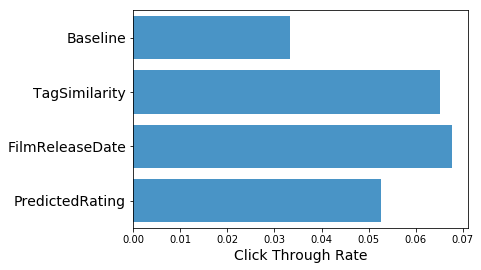

In [28]:
fig, ax = plt.subplots()

ax = sns.barplot(x="rec_played/total_played", y="Algorithm", order=["Baseline", "TagSimilarity","FilmReleaseDate", "PredictedRating"],data=aggregate_data_wpercent, label='big', color='#3498db')

## Change ordering here!!!
ax.set_ylabel('')
plt.yticks(size = 14)
ax.set_xlabel('Click Through Rate',fontsize=14)

In [33]:
def savefig(figure, name):
    for fmt in ['pdf', 'eps']:
        fn = "../{}.{}".format(name, fmt)
        figure.savefig(fn, format=fmt, dpi=300, bbox_inches='tight', pad_inches=0.1, frameon=True)
        print("saved figure {} as {}".format(figure, fn))

In [30]:
savefig(fig, "Click through rate")


saved figure Figure(432x288) as ../Click through rate.pdf
saved figure Figure(432x288) as ../Click through rate.eps


### Calculate and Visualize Click Through Rate with Descriptive Alg Names


### Calculate and Visualize ratio of Click Through, group by algorithm ###

In [25]:
aggregate_data2 = pd.read_csv('../Clean_Data/total_rec_refresh_aggregate.csv', sep=',').drop('Unnamed: 0',axis=1).copy()
aggregate_data2.loc[aggregate_data2.Algorithm == 'ShuffledTopPicks', 'Algorithm'] = 'Baseline'
aggregate_data2.loc[aggregate_data2.Algorithm == 'TagSimilarity', 'Algorithm'] = 'Similarity-based'
aggregate_data2.loc[aggregate_data2.Algorithm == 'PredictedRating', 'Algorithm'] = 'Personalized'
aggregate_data2.loc[aggregate_data2.Algorithm == 'FilmReleaseDate', 'Algorithm'] = 'Recency-based'




aggregate_data2.head()

,userId,loginId,Algorithm,count_total_played,count_rec_played,count_refresh
0,1892,Nm0bajY,Similarity-based,1,0.0,0.0
1,12337,OnHpLST,Personalized,1,0.0,0.0
2,16783,2bqCVrC,Similarity-based,19,0.0,0.0
3,22005,M1nww5f,Baseline,1,0.0,0.0
4,26229,t7hZ2Ty,Personalized,1,0.0,0.0


In [26]:
aggregate_data2.groupby('Algorithm').sum()

,userId,count_total_played,count_rec_played,count_refresh
Algorithm,,,,
Baseline,3462185690,41154,1369.0,43.0
Personalized,3461143620,41675,2191.0,99.0
Recency-based,3486519042,41401,2802.0,94.0
Similarity-based,3503467035,42729,2780.0,102.0


In [27]:
# Calculating the percentages:
aggregate_data2.groupby('Algorithm').sum()['count_rec_played']/aggregate_data2.groupby('Algorithm').sum()['count_total_played']


Algorithm
Baseline            0.033265
Personalized        0.052573
Recency-based       0.067680
Similarity-based    0.065061
dtype: float64

In [28]:
aggregate_data2_wpercent = aggregate_data2.groupby('Algorithm').sum().reset_index()


In [29]:
aggregate_data2.head()

,userId,loginId,Algorithm,count_total_played,count_rec_played,count_refresh
0,1892,Nm0bajY,Similarity-based,1,0.0,0.0
1,12337,OnHpLST,Personalized,1,0.0,0.0
2,16783,2bqCVrC,Similarity-based,19,0.0,0.0
3,22005,M1nww5f,Baseline,1,0.0,0.0
4,26229,t7hZ2Ty,Personalized,1,0.0,0.0


In [30]:
aggregate_data2_wpercent['rec_played/total_played'] = aggregate_data2_wpercent['count_rec_played']/aggregate_data2_wpercent['count_total_played']


In [31]:
aggregate_data2_wpercent

,Algorithm,userId,count_total_played,count_rec_played,count_refresh,rec_played/total_played
0,Baseline,3462185690,41154,1369.0,43.0,0.033265
1,Personalized,3461143620,41675,2191.0,99.0,0.052573
2,Recency-based,3486519042,41401,2802.0,94.0,0.067680
3,Similarity-based,3503467035,42729,2780.0,102.0,0.065061


Text(0.5,0,'Click Through Rate')

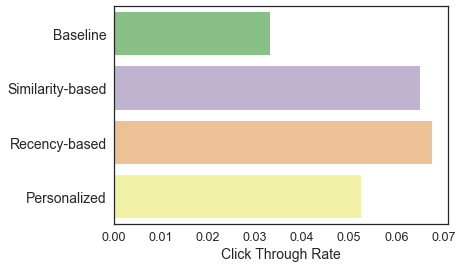

In [57]:
fig, ax = plt.subplots()

palette = ["#7fc97f", '#beaed4', '#fdc086','#ffff99']
ax = sns.barplot(x="rec_played/total_played", y="Algorithm", order=["Baseline", "Similarity-based","Recency-based", "Personalized"],data=aggregate_data2_wpercent, label='big', palette=palette)

## Change ordering here!!!
ax.set_ylabel('')
plt.yticks(size = 14)
ax.set_xlabel('Click Through Rate',fontsize=14)

In [58]:
savefig(fig, "Click_Through_Rate_Recsys_Presentation")

saved figure Figure(432x288) as ../Click_Through_Rate_Recsys_Presentation.pdf
saved figure Figure(432x288) as ../Click_Through_Rate_Recsys_Presentation.eps


### Counts and quantiles of rec_played and total_played, group by algorithm

In [20]:
aggregate_data.groupby('Algorithm').quantile(0.5)

0.5,count_rec_played,count_refresh,count_total_played,userId
Algorithm,,,,
Baseline,0.0,0.0,2.0,290308.0
FilmReleaseDate,0.0,0.0,2.0,290653.0
PredictedRating,0.0,0.0,2.0,290039.0
TagSimilarity,0.0,0.0,2.0,289964.0


In [21]:
aggregate_data.groupby('Algorithm').quantile(0.95)

0.95,count_rec_played,count_refresh,count_total_played,userId
Algorithm,,,,
Baseline,1.0,0.0,11.0,313084.00
FilmReleaseDate,1.0,0.0,11.0,313355.20
PredictedRating,1.0,0.0,11.0,313037.00
TagSimilarity,1.0,0.0,11.0,312958.85


### Count of actions, group by algorithm


An explanation of the actions:

A list of the actions:

    ['TrailerModalLaunched', 'PlayedFromLaunch', 'PlayedFromNext',
    'PlayedFromRecommendation', 'MovieDetailsModalOpened',
    'TrailerPaused', 'MovieDetailsModalClosed', 'TrailerModalShutdown',
    'IssueRaised', 'PlayedFromYoutubePlayer', 'TrailerEnded',
    'TrailerLiked', 'GoToMovieDetails', 'RecommendationsRefreshed',
    'TrailerUnliked', 'TrailerDisliked', 'TrailerUndisliked',
    'WishlistedMovie', 'UnwishlistedMovie', 'PlayedFromPrevious',
    'RatedMovie']
       
#### If a user opens the trailer from the movie detail page: ####
* TrailerModalLaunched: If a user opens the trailer from the movie detail page
* PlayedFromLaunch: Happens right after 'TrailerModalLaunched'

#### User clicked in the trailer interface to go to a different trailer recommended: ####
* PlayedFromNext
* PalyedFromPrevious
* PlayedFromRecommendation


### Visualize ratio of number of each action over rec_clicks

In [50]:
# Data below generated in 2 - Counts of actions (Like, Dislike, Wishlist, DetailModel, Watch>50%) - by Algorithm

#interactions_rec_ratio = pd.read_csv("../Clean_Data/interactions_rec_ratio.csv")
### Using the table generated on 9.15, because previous table is not in github.
interactions_rec_ratio = pd.read_csv("../Clean_Data/interactions_rec_ratio_9_15.csv")


# Rename ShuffledTopPicks -> Baseline
interactions_rec_ratio.loc[interactions_rec_ratio.recommenderId == 'ShuffledTopPicks', 'recommenderId'] = 'Baseline'
interactions_rec_ratio.loc[interactions_rec_ratio.recommenderId == 'TagSimilarity', 'recommenderId'] = 'Similarity-based'
interactions_rec_ratio.loc[interactions_rec_ratio.recommenderId == 'PredictedRating', 'recommenderId'] = 'Personalized'
interactions_rec_ratio.loc[interactions_rec_ratio.recommenderId == 'FilmReleaseDate', 'recommenderId'] = 'Recency-based'



# ViewedMovieDetails is the sum of MovieDetailsModalOpened and GoToMovieDetails
interactions_rec_ratio.loc[interactions_rec_ratio.action == 'MovieDetailsModalOpened', 'action'] = 'ViewedMovieDetails'
interactions_rec_ratio.loc[interactions_rec_ratio.action == 'GoToMovieDetails', 'action'] = 'ViewedMovieDetails'

interactions_rec_ratio.rename(columns={'recommenderId':'Algorithm'},inplace=True)
interactions_rec_ratio.sort_values(by='Algorithm',inplace=True)
interactions_rec_ratio.sort_values(by="action",inplace=True)

interactions_rec_ratio = interactions_rec_ratio[interactions_rec_ratio.action != "ViewedMovieDetails"].copy()


In [51]:
interactions_rec_ratio = interactions_rec_ratio.groupby(['action','Algorithm']).sum().reset_index()

Text(0,0.5,'')

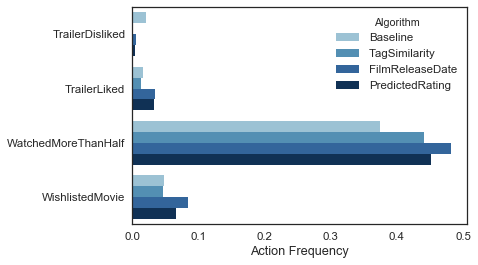

In [49]:
fig, ax = plt.subplots()


palette = ["#92c5de", '#4393c3', '#2265ac','#053060']

# ax = sns.barplot(x="ratio_action_rec_clicks", y="action", hue="Algorithm", data=interactions_rec_ratio, palette=sns.diverging_palette(10, 250, s=80, l=60, n=4))
ax = sns.barplot(x="ratio_action_rec_clicks", y="action", order=["TrailerDisliked", "TrailerLiked", "WatchedMoreThanHalf","WishlistedMovie"], hue="Algorithm", hue_order = ['Baseline', 'TagSimilarity','FilmReleaseDate','PredictedRating'],data=interactions_rec_ratio, palette=palette)

sns.set(font_scale=1.15)
sns.set_style("white")

ax.set_xlabel('Action Frequency')
ax.set_ylabel('')

# ['Baseline', 'TagSimilarity','FilmReleaseDate','PredictedRating']

### The graph below is generated for RecSys presentation. 

Text(0,0.5,'')

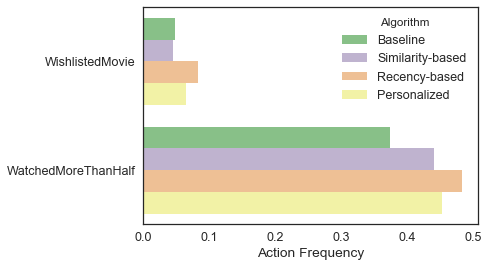

In [60]:
fig, ax = plt.subplots()


palette = ["#7fc97f", '#beaed4', '#fdc086','#ffff99']

# ax = sns.barplot(x="ratio_action_rec_clicks", y="action", hue="Algorithm", data=interactions_rec_ratio, palette=sns.diverging_palette(10, 250, s=80, l=60, n=4))
ax = sns.barplot(x="ratio_action_rec_clicks", y="action", order=["WishlistedMovie","WatchedMoreThanHalf"], hue="Algorithm", hue_order = ['Baseline', 'Similarity-based','Recency-based','Personalized'],data=interactions_rec_ratio, palette=palette)

sns.set(font_scale=1.25)
sns.set_style("white")

ax.set_xlabel('Action Frequency')
ax.set_ylabel('')

# ['Baseline', 'TagSimilarity','FilmReleaseDate','PredictedRating']

In [61]:
savefig(fig, "Action_Frequency_recsys_presentation")


saved figure Figure(432x288) as ../Action_Frequency_recsys_presentation.pdf
saved figure Figure(432x288) as ../Action_Frequency_recsys_presentation.eps


### The ratio of #actions over #total played, group by algorithm

We need to double check the data is correct if we need it in our analysis (See Data Preparation/2 - Counts of actions (Like, Dislike, Wishlist, DetailModel, Watch>50%) - by Algorithm.ipynb)

In [30]:
# Data below generated in 2 - Counts of actions (Like, Dislike, Wishlist, DetailModel, Watch>50%) - by Algorithm
interactions_total_ratio = pd.read_csv("../Clean_Data/interactions_total_ratio.csv")

# Rename ShuffledTopPicks -> Baseline
interactions_total_ratio.loc[interactions_total_ratio.recommenderId == 'ShuffledTopPicks', 'recommenderId'] = 'Baseline'

# ViewedMovieDetails is the sum of MovieDetailsModalOpened and GoToMovieDetails
interactions_total_ratio.loc[interactions_total_ratio.action == 'MovieDetailsModalOpened', 'action'] = 'ViewedMovieDetails'
interactions_total_ratio.loc[interactions_total_ratio.action == 'GoToMovieDetails', 'action'] = 'ViewedMovieDetails'

interactions_total_ratio.rename(columns={'recommenderId':'Algorithm'},inplace=True)
interactions_total_ratio.sort_values(by='Algorithm',inplace=True)
interactions_total_ratio.sort_values(by="action",inplace=True)


interactions_total_ratio = interactions_total_ratio[interactions_total_ratio.action != 'ViewedMovieDetails']


In [32]:
interactions_total_ratio = interactions_total_ratio.groupby(['action','Algorithm']).sum().reset_index()

Text(0,0.5,'')

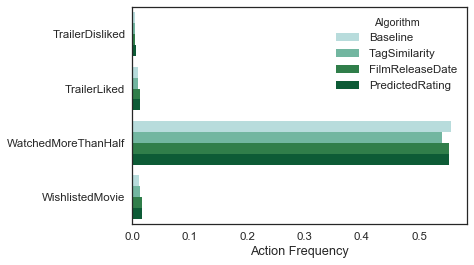

In [33]:
#### Create a barchart with counts of some meaningful actions
# palette = ['#d7191c', '#fdae61', '#abd9e9','#2c7bb6']
# palette = ['#66c2a5', '#fc8d62', '#8da0cb','#e78ac3']
palette = ["#b2e2e2", '#66c2a4', '#238b45','#006837']

# ax = sns.barplot(x="ratio_action_rec_clicks", y="action", hue="Algorithm", data=interactions_rec_ratio, palette=sns.diverging_palette(10, 250, s=80, l=60, n=4))
ax = sns.barplot(x="ratio_action_total_clicks", y="action", hue="Algorithm", hue_order = ['Baseline', 'TagSimilarity','FilmReleaseDate','PredictedRating'],data=interactions_total_ratio, palette=palette)

sns.set(font_scale=1.2)
sns.set_style("white")

ax.set_xlabel('Action Frequency')
ax.set_ylabel('')

# ['Baseline', 'TagSimilarity','FilmReleaseDate','PredictedRating']

### Percentage Watched, broken by Algorithms

In [55]:
# Data ends on 2018-01-17
watch = pd.read_csv('../Clean_Data/log_trailer_watch.csv')
watch_small = watch[watch['tstamp']<"2018-01-17 01:59:42"]

mlusers = [32451,49002,49253,50540,51234,51714,65817,66644,68903,70023,70026,92721,92723,95195,96279,96483,96691,97397,104218,113699,114092,114844,122798,124450,124790,125283,125431,127628,127979,129299,130353,132131,132145,132637,132726,132728,132871,133047,134070,134088,134143,134235,134342,134349,134372,134373,134393,134484,134496,134498,134504,134533,135260,135670,136346,136505,136995,137096,137331,137372,138083,138089,138090,138108,141799,142115,143473,149815,151709,151982,166008,173637,176970,183038,183567,197881,202657,207221,221192,221515,225510,233659,233985,237287,237332,238576,238876,240312,242238,242683,243010,243445,245696,246018,246058,246587,246828,248583,251610,251922,252238,252534,253066,253866,253869,257628,257629,257756,258553,258554,258555,258556,258557,258558,258559,258560,258561,258562,258563,258564,258565,259056,260701,264178,266542,268253,269945,286014,287206,292397,301040,304542,313322,316070,317416,318334]

watch_noml = watch_small[~watch_small.userId.isin(mlusers)].copy()

In [56]:
watch_noml.sort_values('percentWatched',ascending=False, inplace=True)

watch_noml.sort_values(by=['loginId','movieId'],inplace=True)

watch_noml = watch_noml[watch_noml['percentWatched']<=100].copy()
watch_noml = watch_noml.drop_duplicates(subset=["loginId","movieId"], keep="first").copy()


In [65]:
rec_played_alg = pd.read_csv("../Clean_Data/rec_played_alg.csv")
rec_played_alg.loc[rec_played_alg.recommenderId == 'ShuffledTopPicks', 'recommenderId'] = 'Baseline'

In [66]:
rec_alg_watch2 = pd.merge(rec_played_alg, watch_noml, on = ["loginId", "movieId"], how="left")

In [67]:
rec_alg_watch2.groupby(['recommenderId','percentWatched']).count()
rec_alg_watch2

,Unnamed: 0,userId_x,loginId,movieId,action,tstamp_x,position,sessionIds,recommenderId,userId_y,youtubeTrailerId,percentWatched,positionInList,tstamp_y
0,34,304211,00bSwKf,159193,PlayedFromRecommendation,2017-04-29 07:07:09,4,3,FilmReleaseDate,304211.0,4NRQPTE2Y-c,90.0,4.0,2017-04-29 07:08:52
1,66,304211,00bSwKf,132800,PlayedFromRecommendation,2017-04-29 07:15:57,6,6,FilmReleaseDate,304211.0,r0KEe-hMsLg,75.0,6.0,2017-04-29 07:17:50
2,70,304211,00bSwKf,161966,PlayedFromRecommendation,2017-04-29 07:18:04,2,6,FilmReleaseDate,NaN,NaN,NaN,NaN,NaN
3,83,304211,00bSwKf,5617,PlayedFromRecommendation,2017-04-29 07:18:16,0,6,FilmReleaseDate,304211.0,AFma24S-Uvw,90.0,0.0,2017-04-29 07:22:42
4,87,304211,00bSwKf,113829,PlayedFromRecommendation,2017-04-29 07:18:34,7,6,FilmReleaseDate,304211.0,jCOvhojlZzQ,79.0,7.0,2017-04-29 07:20:30
5,98,304211,00bSwKf,5617,PlayedFromRecommendation,2017-04-29 07:20:36,0,6,FilmReleaseDate,304211.0,AFma24S-Uvw,90.0,0.0,2017-04-29 07:22:42
6,226,288081,00RaoYu,149354,PlayedFromRecommendation,2016-06-21 23:34:58,2,3,FilmReleaseDate,NaN,NaN,NaN,NaN,NaN
7,560,288081,00RaoYu,109483,PlayedFromRecommendation,2016-06-21 23:46:39,8,19,FilmReleaseDate,NaN,NaN,NaN,NaN,NaN
8,798,256772,01UV88x,376,PlayedFromRecommendation,2017-01-15 19:14:50,13,1,PredictedRating,256772.0,_ItXkYO1Xj0,45.0,13.0,2017-01-15 19:16:16
9,803,256772,01UV88x,368,PlayedFromRecommendation,2017-01-15 19:23:42,10,2,PredictedRating,256772.0,507KAlpplHw,90.0,10.0,2017-01-15 19:24:55


In [61]:
percentRange = []

for index, row in rec_alg_watch2.iterrows():
    if row[11] >80:
        percentRange.append('>80')
    elif row[11] >60:
        percentRange.append('60-80')
    elif row[11] >40:
        percentRange.append('40-60')
    elif row[11] >20:
        percentRange.append('20-40')
    else:
        percentRange.append('0-20')
rec_alg_watch2['percentRange'] = percentRange
rec_alg_watch2.count()

Unnamed: 0          9142
userId_x            9142
loginId             9142
movieId             9142
action              9142
tstamp_x            9142
position            9142
sessionIds          9142
recommenderId       9142
userId_y            6045
youtubeTrailerId    6045
percentWatched      6045
positionInList      6045
tstamp_y            6045
percentRange        9142
dtype: int64

In [53]:
rec_watch_count = rec_alg_watch2.groupby(['recommenderId','percentRange']).count().reset_index()

In [62]:
rec_watch_count.loc[rec_watch_count.recommenderId == 'ShuffledTopPicks', 'recommenderId'] = 'Baseline'

rec_watch_count2 = rec_watch_count.drop(["userId_x","movieId","action","sessionIds","userId_y","youtubeTrailerId","positionInList","tstamp_y"],axis=1)

In [63]:
frequency = []

# rec_watch_count['Frequency'] = rec_watch_count['userId_x']/9142
for index, row in rec_watch_count2.iterrows():
    
    if row[0] == "FilmReleaseDate":
        frequency.append(row[6]/2802)
    elif row[0] == "PredictedRating":
        frequency.append(row[6]/2191)
    elif row[0] == "Baseline":
        frequency.append(row[6]/1369)
    elif row[0] == "TagSimilarity":
        frequency.append(row[6]/2780)

rec_watch_count2['Frequency'] = frequency

In [64]:
rec_watch_count2

,recommenderId,percentRange,Unnamed: 0,loginId,tstamp_x,position,percentWatched,Frequency
0,Baseline,0-20,701,701,701,701,105,0.076698
1,Baseline,20-40,66,66,66,66,66,0.048210
2,Baseline,40-60,118,118,118,118,118,0.086194
3,Baseline,60-80,64,64,64,64,64,0.046749
4,Baseline,>80,420,420,420,420,420,0.306793
5,FilmReleaseDate,0-20,1078,1078,1078,1078,261,0.093148
6,FilmReleaseDate,20-40,193,193,193,193,193,0.068879
7,FilmReleaseDate,40-60,285,285,285,285,285,0.101713
8,FilmReleaseDate,60-80,209,209,209,209,209,0.074590
9,FilmReleaseDate,>80,1037,1037,1037,1037,1037,0.370093


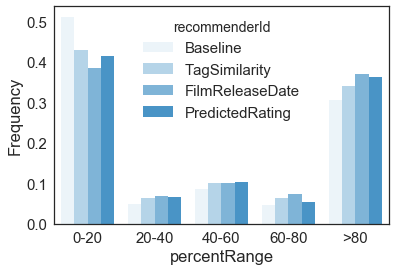

In [70]:
# Visualize the distribution
f, ax = plt.subplots()
sns.set(color_codes=True) 
sns.set(font_scale=1.5)
sns.set_style("white")
x = np.random.normal(size=100)
# ax = sns.barplot(x="percentRange", y="frequency", data=watch_count, palette="Greens_d")
ax = sns.barplot(x="percentRange", y="Frequency", hue="recommenderId", hue_order = ['Baseline', 'TagSimilarity','FilmReleaseDate','PredictedRating'], data=rec_watch_count2, color='#3498db')

